In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import f90nml
from salishsea_tools import metric_tools_5x5 as met

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [2]:
reference_namelist_file = '/data/jpetrie/MEOPAR/SS-run-sets/SS-SMELT/namelists/namelist_pisces_cfg_5x5_NewIC'
reference_bio_params = f90nml.read(reference_namelist_file)

In [3]:
tracer_file = 'SS5x5_1h_20150201_20150501_ptrc_T.nc'

param_metrics = pd.DataFrame()

batch_directories = [
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampiszoo_june_14/',
                     '/data/jpetrie/MEOPAR/SalishSea/results/nampisopt_june_14/',
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampismes_june_14/',
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampissink_june_17/',
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampisprod_june_16/',
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampismort_june_17/',
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampisrem_june_17/',
                     #'/data/jpetrie/MEOPAR/SalishSea/results/nampismezo_june_20/',
]

metric_func_list = [
                    met.mean_NH4_at_depth,
                    met.mean_NO3_at_depth,
                    met.mean_DON_at_depth,
                    met.mean_PON_at_depth,
                    met.time_of_peak_PHY2,
                    met.time_surface_NO3_drops_below_4,
                    met.peak_3_day_biomass,
]

for batch_dir in batch_directories:
    for file in os.listdir(batch_dir):
        if os.path.isfile(batch_dir + '/' + file + '/' + tracer_file) and 'zz_frac_waste' not in file:
            last_underscore = file.rfind('_')
            first_underscore = file.find('_')
            param_section = file[:first_underscore]
            param_name = file[(first_underscore+1):last_underscore]
            param_val = float(file[(last_underscore+1):])
            param_desc = param_section + ' ' + param_name
            
            original_val = reference_bio_params[param_section][param_name]
            
            if type(original_val) is list:
                param_scale = round(param_val/original_val[0], 3)
            else:
                param_scale = round(param_val/original_val, 3)
            
            grid_t = xr.open_dataset(batch_dir + '/' + file +'/' + tracer_file)
            
            for metric_func in metric_func_list:
                metric_val = metric_func(grid_t)
                metric_name = metric_func.__name__
                # inefficient to keep appending, but much less expensive than other parts of the loop so it doesn't matter
                param_metrics = param_metrics.append(pd.DataFrame({"PARAM_SECTION":[param_section],
                                                                   "PARAM_NAME":[param_name],
                                                                   "PARAM_DESC":[param_desc],
                                                                   "PARAM_VAL":[param_val],
                                                                   "PARAM_SCALE":[param_scale],
                                                                   "METRIC_NAME":[metric_name],
                                                                   "METRIC_VAL": [metric_val]}))


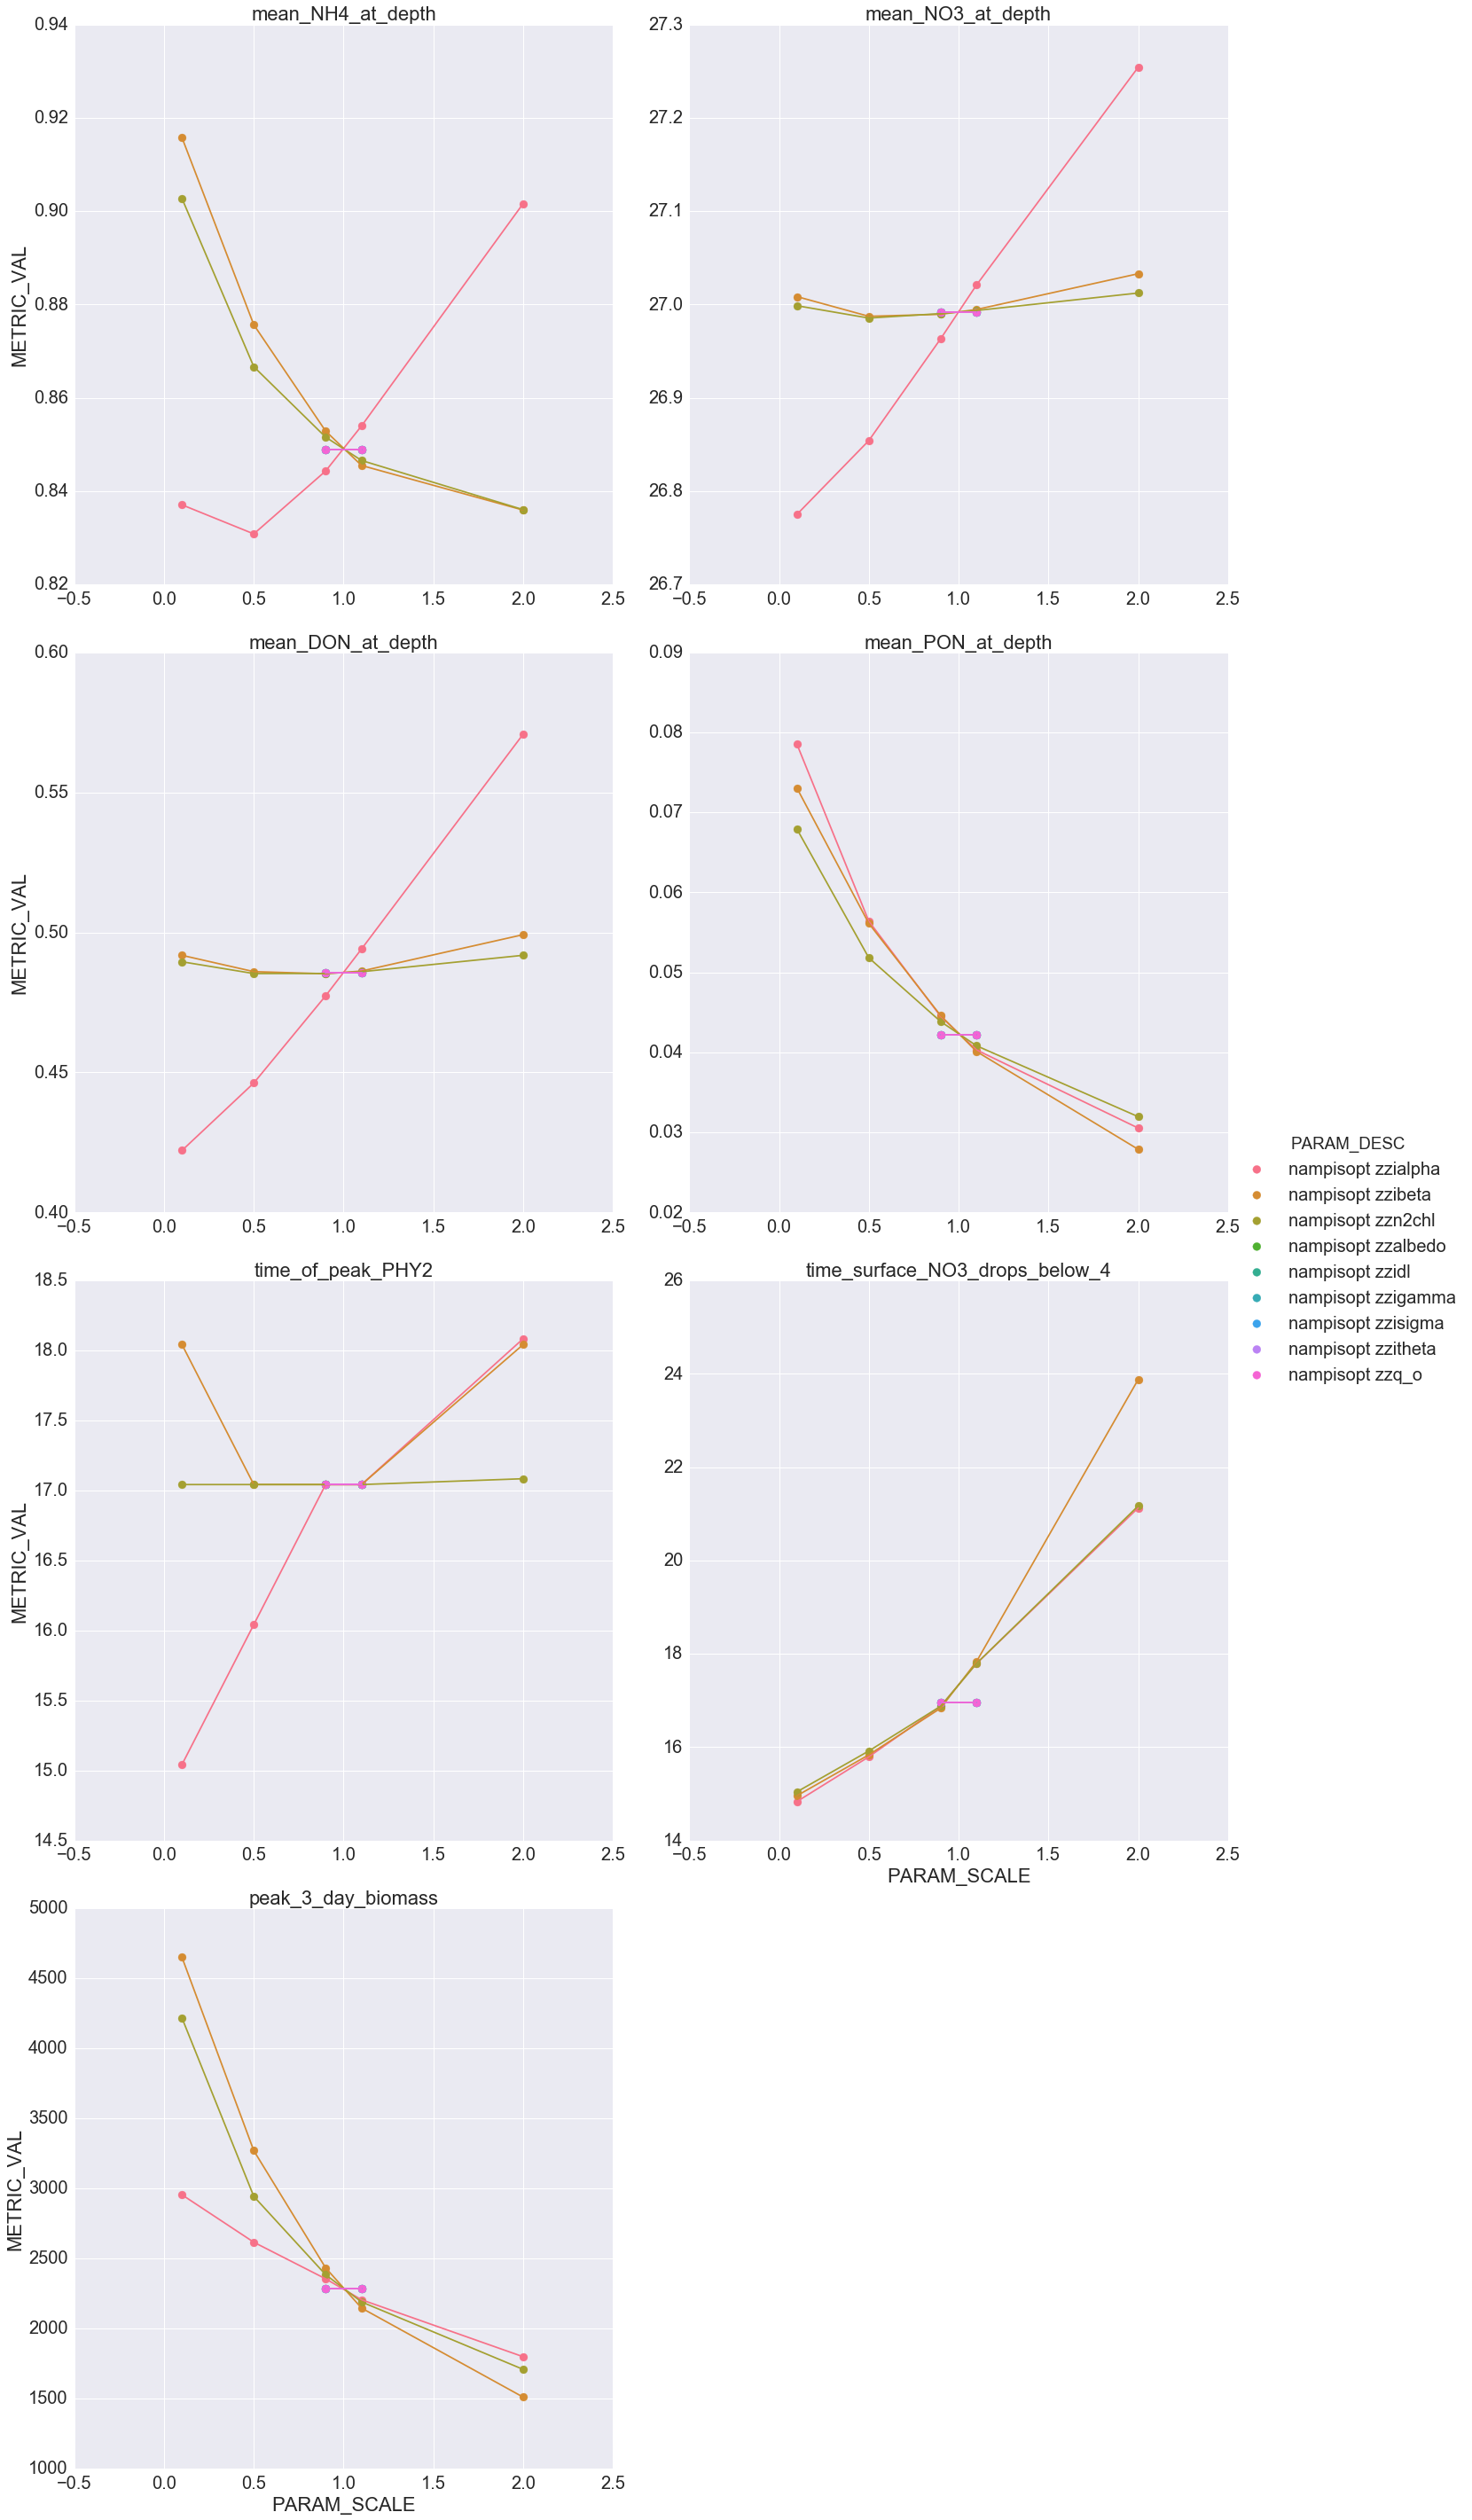

In [4]:
sns.set(font_scale = 2)
plt.rcParams['image.cmap'] = 'jet'

param_metrics = param_metrics.sort_values(["PARAM_SCALE", "PARAM_DESC"])

fg = sns.FacetGrid(data=param_metrics.query("PARAM_SCALE < 10"), col = "METRIC_NAME", hue = "PARAM_DESC", sharex=False, sharey=False, col_wrap = 2, size = 10)
fg.map(plt.scatter, "PARAM_SCALE", "METRIC_VAL", s = 80)
fg.map(plt.plot, "PARAM_SCALE", "METRIC_VAL")
fg.add_legend()
fg.set_titles("{col_name}")

In [5]:
param_metrics["PARAM_SCALE"] = "PARAM_SCALE_" + param_metrics["PARAM_SCALE"].astype(str)
wide_format_metrics = pd.pivot_table(param_metrics, values='METRIC_VAL', index=['PARAM_SECTION','PARAM_NAME', 'PARAM_DESC', 'METRIC_NAME'], columns=['PARAM_SCALE'])
wide_format_metrics.reset_index(inplace=True)
wide_format_metrics["SLOPE"] = (wide_format_metrics["PARAM_SCALE_1.1"] - wide_format_metrics["PARAM_SCALE_0.9"])/0.2

In [8]:
wide_format_metrics

PARAM_SCALE,PARAM_SECTION,PARAM_NAME,PARAM_DESC,METRIC_NAME,PARAM_SCALE_0.1,PARAM_SCALE_0.5,PARAM_SCALE_0.9,PARAM_SCALE_1.1,PARAM_SCALE_10.0,PARAM_SCALE_2.0,SLOPE
0,nampisopt,zzalbedo,nampisopt zzalbedo,mean_DON_at_depth,NaN,NaN,0.485586,0.485586,NaN,NaN,0.000000
1,nampisopt,zzalbedo,nampisopt zzalbedo,mean_NH4_at_depth,NaN,NaN,0.848817,0.848817,NaN,NaN,0.000000
2,nampisopt,zzalbedo,nampisopt zzalbedo,mean_NO3_at_depth,NaN,NaN,26.991837,26.991837,NaN,NaN,0.000000
3,nampisopt,zzalbedo,nampisopt zzalbedo,mean_PON_at_depth,NaN,NaN,0.042254,0.042254,NaN,NaN,0.000000
4,nampisopt,zzalbedo,nampisopt zzalbedo,peak_3_day_biomass,NaN,NaN,2281.297485,2281.297485,NaN,NaN,0.000000
5,nampisopt,zzalbedo,nampisopt zzalbedo,time_of_peak_PHY2,NaN,NaN,17.041667,17.041667,NaN,NaN,0.000000
6,nampisopt,zzalbedo,nampisopt zzalbedo,time_surface_NO3_drops_below_4,NaN,NaN,16.958333,16.958333,NaN,NaN,0.000000
7,nampisopt,zzialpha,nampisopt zzialpha,mean_DON_at_depth,0.422124,0.446223,0.477361,0.494086,1.448827,0.570803,0.083625
8,nampisopt,zzialpha,nampisopt zzialpha,mean_NH4_at_depth,0.837064,0.830832,0.844307,0.853973,1.431635,0.901618,0.048326
9,nampisopt,zzialpha,nampisopt zzialpha,mean_NO3_at_depth,26.775089,26.854102,26.963178,27.020897,29.539230,27.254088,0.288598


/home/jpetrie/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


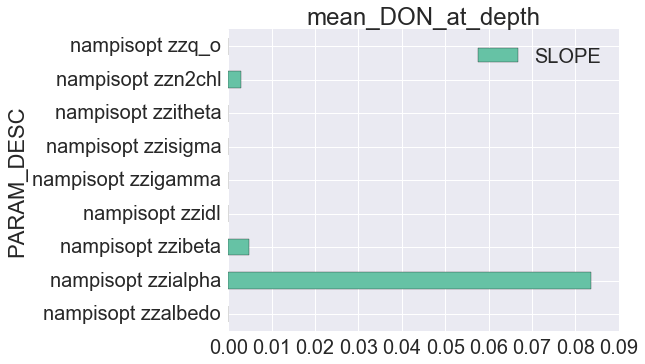

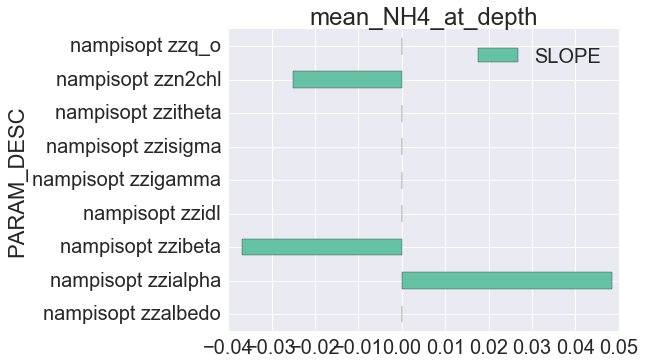

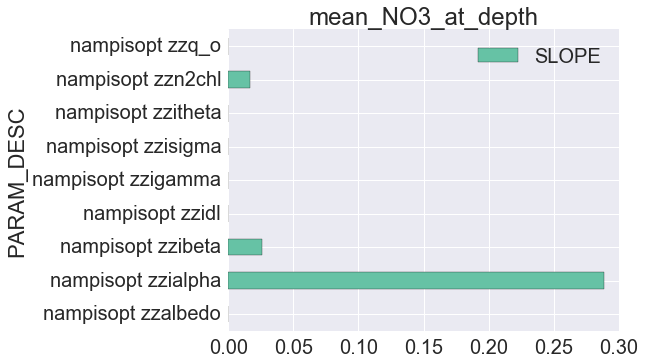

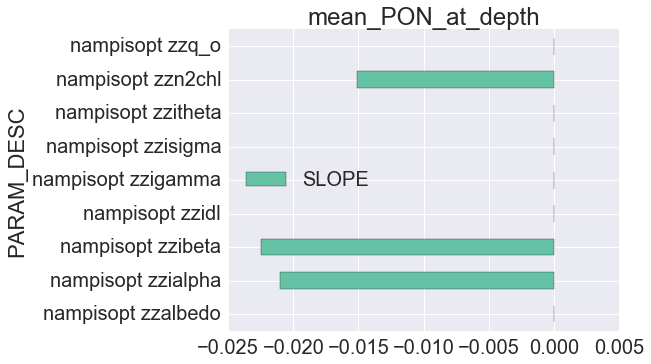

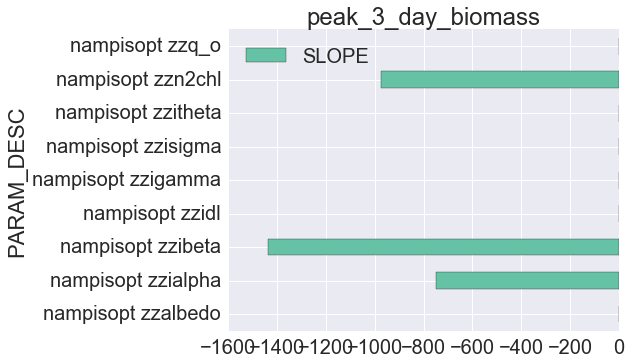

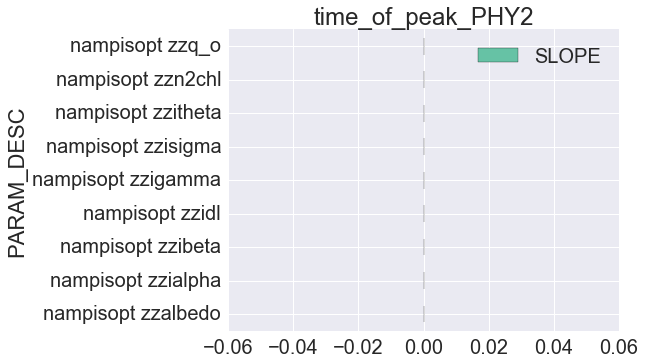

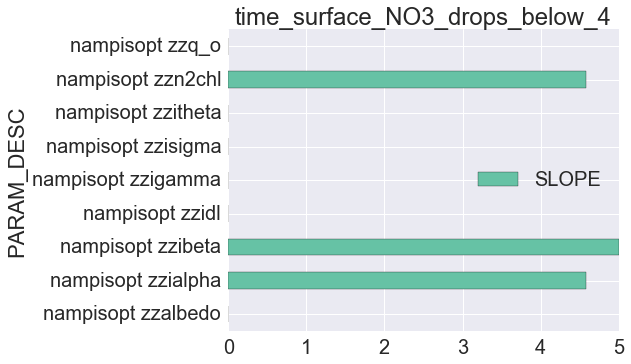

In [6]:
cmap = plt.get_cmap('Set2')
for metric_name in np.unique(wide_format_metrics["METRIC_NAME"]):
    x = wide_format_metrics.query("METRIC_NAME == @metric_name")
    
    categories = np.unique(x["PARAM_SECTION"])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  
    x["COLOR"] = x["PARAM_SECTION"].apply(lambda x: colordict[x])
    
    x.plot.barh("PARAM_DESC",  "SLOPE", figsize = (7,0.6*len(x["SLOPE"])), color = cmap(x.COLOR), title = metric_name)